In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

/home/sanskriti/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
result_path_dict = {
    'ETTh1-prob-M' : 'informer_ETTh1_ftM_sl48_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc3_ebtimeF_dtTrue_mxTrue_Exp_0',
    'ETTh2-prob-M' : 'informer_ETTh2_ftM_sl48_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_Exp_0',
    'ECL-prob-M'   : 'informer_ECL_ftM_sl96_ll96_pl48_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_Exp_0',
    'WTH-prob-M'   : 'informer_WTH_ftM_sl96_ll96_pl48_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_Exp_0',
    'ETTh1-prob-S' : '',
    'ECL-prob-S'   : '',
    'WTH-prob-S'   : '',
    'ETTh2-prob-S' : 'informer_ETTh2_ftS_sl48_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc3_ebtimeF_dtTrue_mxTrue_Exp_0',
    'ETTh1-full-M' : 'informer_ETTh1_ftM_sl48_ll48_pl24_dm512_nh8_el2_dl1_df2048_atfull_fc3_ebtimeF_dtTrue_mxTrue_Exp_0',
    'ETTh2-full-M' : 'informer_ETTh2_ftM_sl48_ll48_pl24_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_Exp_0',
    'ECL-full-M'   : '',
    'WTH-full-M'   : 'informer_WTH_ftM_sl96_ll96_pl48_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_Exp_0',
    'ETTh1-full-S' : '',
    'ETTh2-full-S' : '',
    'ECL-full-S'   : '',
    'WTH-full-S'   : '',
}

# Probesparse Attention

In [3]:
datasets = ['ETTh1', 'ETTh2', 'ECL', 'WTH']
attentions = ['prob', 'full']

dir_dict = {}
for key in result_path_dict:
    value = result_path_dict[key]
    if value == '':
        continue
    data, attn, var = key.split('-')
    if attn=='prob':
        dir_dict[key] = value

In [4]:
out_file_name = 'output.txt'
metric_file_name = 'metrics.npy'
pred_file_name = 'pred.npy'
true_file_name = 'true.npy'
metrics = ['MAE','MSE','RMSE','MAPE','MSPE']

## Training and Testing output

In [5]:
for key in dir_dict:
    print('\n------------------' + key + '------------------')
    out_file = open(dir_dict[key] + '/' + out_file_name, 'r')
    print(out_file.read())
    out_file.close()


------------------ETTh1-prob-M------------------
Args in experiment:
Namespace(model='informer', data='ETTh1', root_path='./data/ETT/', data_path='ETTh1.csv', features='M', target='OT', freq='h', checkpoints='./checkpoints/', seq_len=48, label_len=48, pred_len=24, enc_in=7, dec_in=7, c_out=7, d_model=512, n_heads=8, e_layers=2, d_layers=1, s_layers=[3, 2, 1], d_ff=2048, factor=3, padding=0, distil=True, dropout=0.05, attn='prob', embed='timeF', activation='gelu', output_attention=False, do_predict=False, mix=True, cols=None, num_workers=0, itr=5, train_epochs=6, batch_size=32, patience=3, learning_rate=0.0001, des='Exp', loss='mse', lradj='type1', use_amp=False, inverse=False, use_gpu=False, gpu=0, use_multi_gpu=False, devices='0,1,2,3', detail_freq='h')
Use CPU
>>>>>>>start training : informer_ETTh1_ftM_sl48_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc3_ebtimeF_dtTrue_mxTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 8569
val 2857
test 2857
	iters: 100, epoch: 1 | loss: 0.4229912
	speed: 

## Visualization

/tmp/ipykernel_62727/2910855455.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


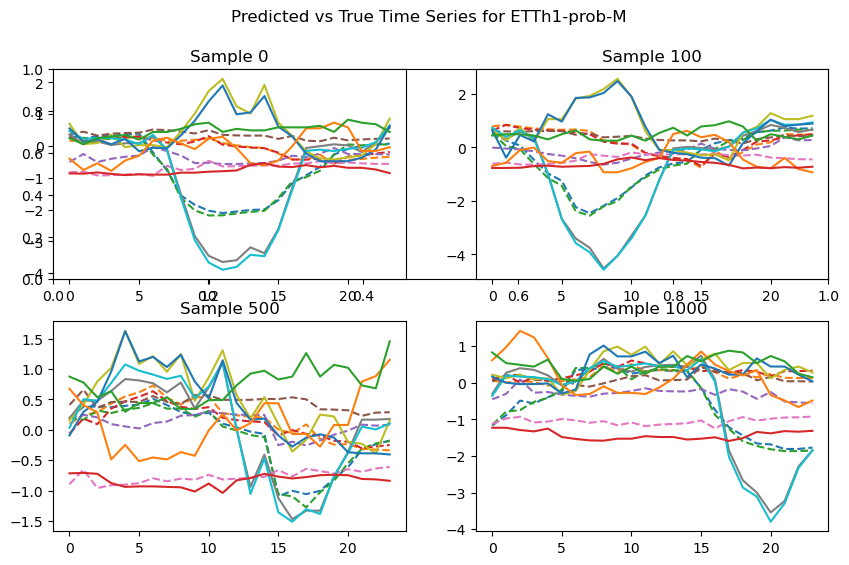

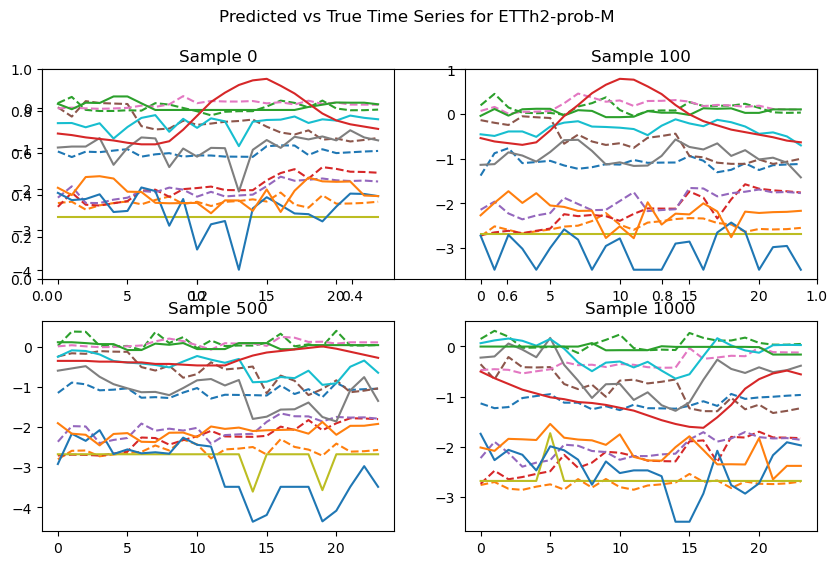

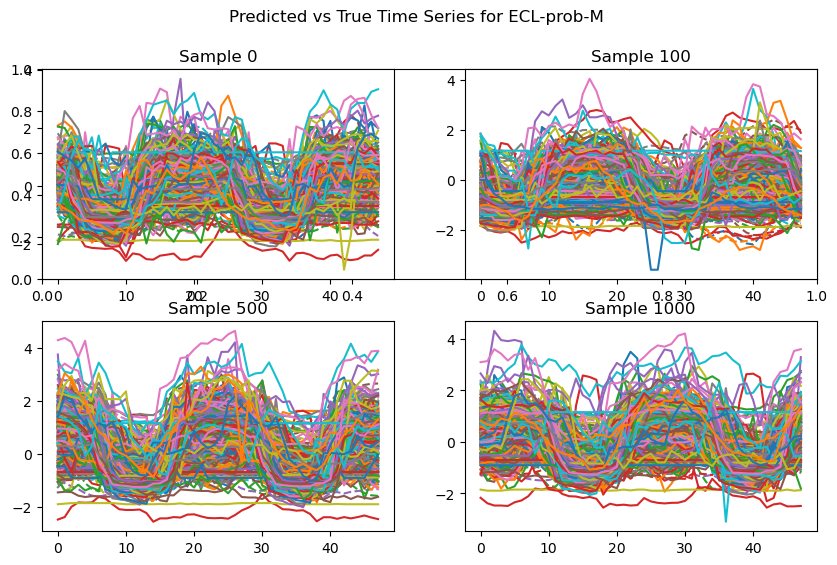

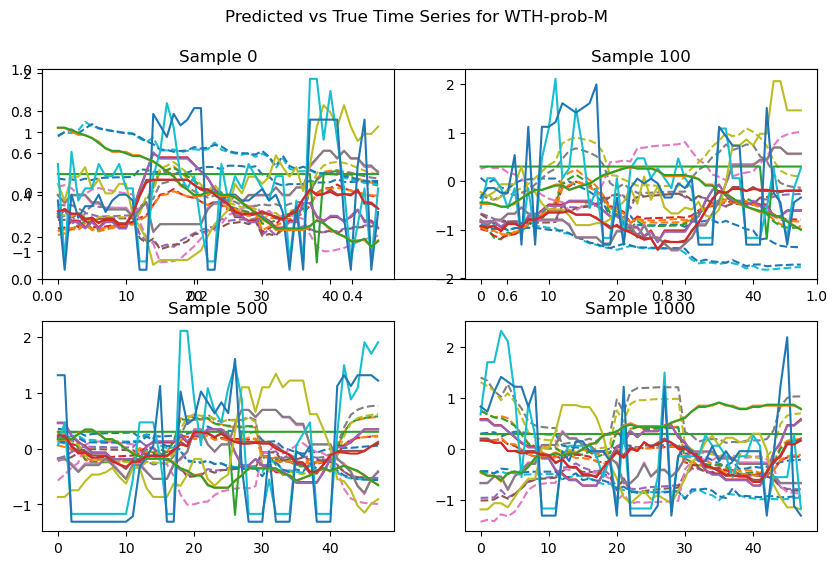

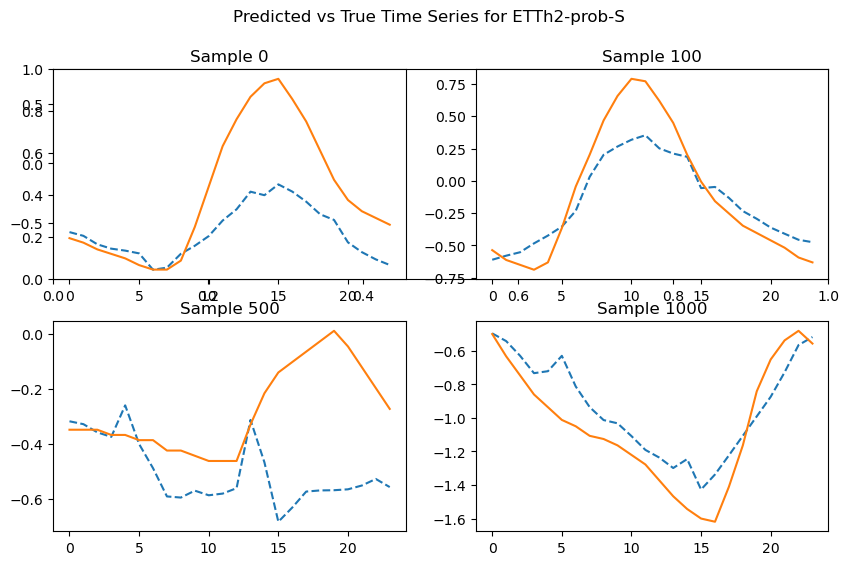

In [6]:
for key in dir_dict:

    dir = dir_dict[key]
    pred = np.load(dir + '/' + pred_file_name)
    true = np.load(dir + '/' + true_file_name)
    
    # Choose samples or time series for visualization
    sample_index = [0, 100, 500, 1000]

    # Extract the predicted and true values for the chosen sample
    pred_values = pred[sample_index].flatten()
    truth_values = true[sample_index].flatten()

    # Plot the predicted and true time series
    fig = plt.figure(figsize=(10, 6))
    fig.suptitle('Predicted vs True Time Series for {}'.format(key))
    plt.subplot(2, 1, 1)
    for i in range(len(sample_index)):
        sub = fig.add_subplot(2, 2, i+1)
        sub.plot(pred[sample_index[i]], label='Predicted', linestyle='dashed')
        sub.plot(true[sample_index[i]], label='True', linestyle='solid')
        sub.set_title('Sample {}'.format(sample_index[i]))
    fig.show()

## Results

In [7]:
table_df = pd.DataFrame(columns=metrics, index=dir_dict.keys())


for key in dir_dict:
    dir = dir_dict[key]
    results = np.load(dir + '/' + metric_file_name)
    for i, metric in enumerate(metrics):
        table_df.loc[key, metric] = results[i]
    
print(table_df)

                   MAE       MSE      RMSE      MAPE          MSPE
ETTh1-prob-M    0.5355  0.536995  0.732799  9.254976  26642.052734
ETTh2-prob-M  0.549798  0.495393  0.703841  4.432818   1037.306396
ECL-prob-M    0.371763  0.281612  0.530671  3.611347    426201.875
WTH-prob-M    0.429609  0.397201  0.630239  1.478917     93.158943
ETTh2-prob-S  0.214129  0.079755   0.28241  0.622387     21.503216


# Cannonical Attention

In [8]:
datasets = ['ETTh1', 'ETTh2', 'ECL', 'WTH']
attentions = ['prob', 'full']

dir_dict = {}
for key in result_path_dict:
    value = result_path_dict[key]
    if value == '':
        continue
    data, attn, var = key.split('-')
    if attn=='full':
        dir_dict[key] = value

## Training and Testing Output

In [9]:
for key in dir_dict:
    print('\n------------------' + key + '------------------')
    out_file = open(dir_dict[key] + '/' + out_file_name, 'r')
    print(out_file.read())
    out_file.close()


------------------ETTh1-full-M------------------
Args in experiment:
Namespace(model='informer', data='ETTh1', root_path='./data/ETT/', data_path='ETTh1.csv', features='M', target='OT', freq='h', checkpoints='./checkpoints/', seq_len=48, label_len=48, pred_len=24, enc_in=7, dec_in=7, c_out=7, d_model=512, n_heads=8, e_layers=2, d_layers=1, s_layers=[3, 2, 1], d_ff=2048, factor=3, padding=0, distil=True, dropout=0.05, attn='full', embed='timeF', activation='gelu', output_attention=False, do_predict=False, mix=True, cols=None, num_workers=0, itr=5, train_epochs=6, batch_size=32, patience=3, learning_rate=0.0001, des='Exp', loss='mse', lradj='type1', use_amp=False, inverse=False, use_gpu=False, gpu=0, use_multi_gpu=False, devices='0,1,2,3', detail_freq='h')
Use CPU
>>>>>>>start training : informer_ETTh1_ftM_sl48_ll48_pl24_dm512_nh8_el2_dl1_df2048_atfull_fc3_ebtimeF_dtTrue_mxTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 8569
val 2857
test 2857
	iters: 100, epoch: 1 | loss: 0.3757050
	speed: 

## Visualization

/tmp/ipykernel_62727/2910855455.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


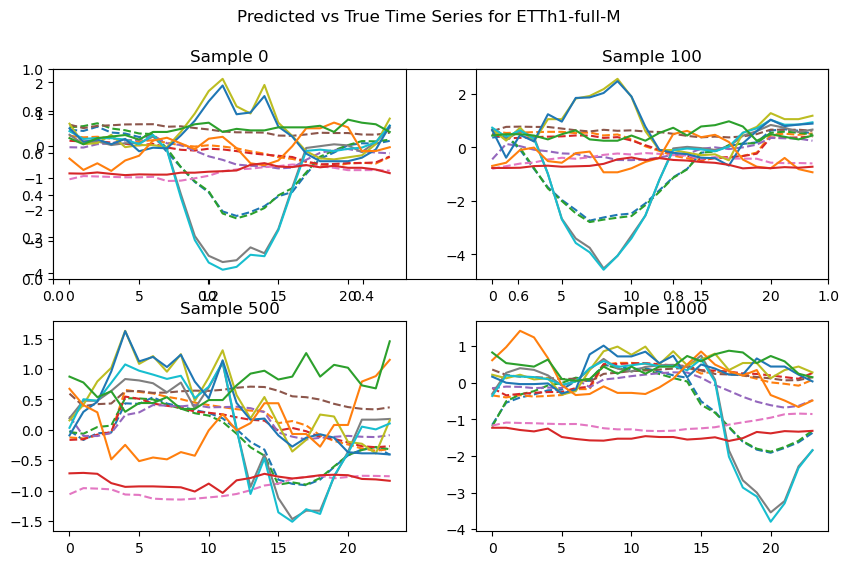

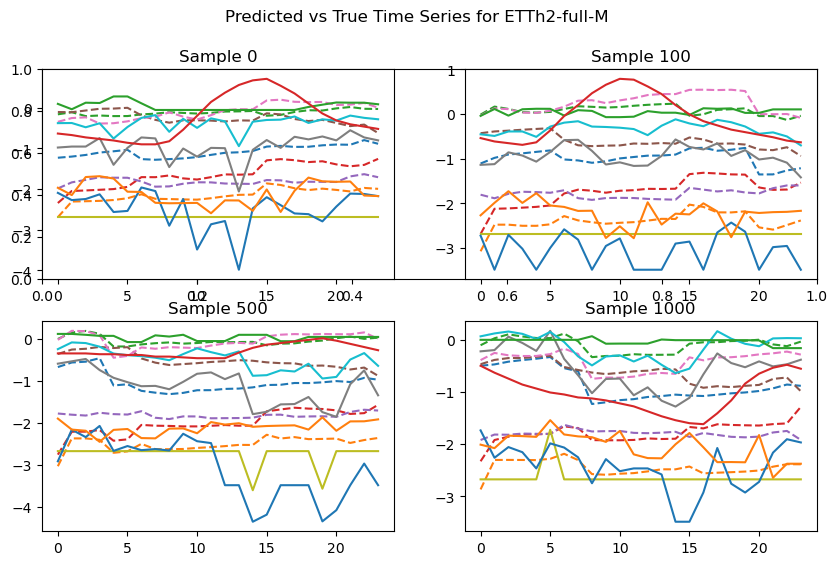

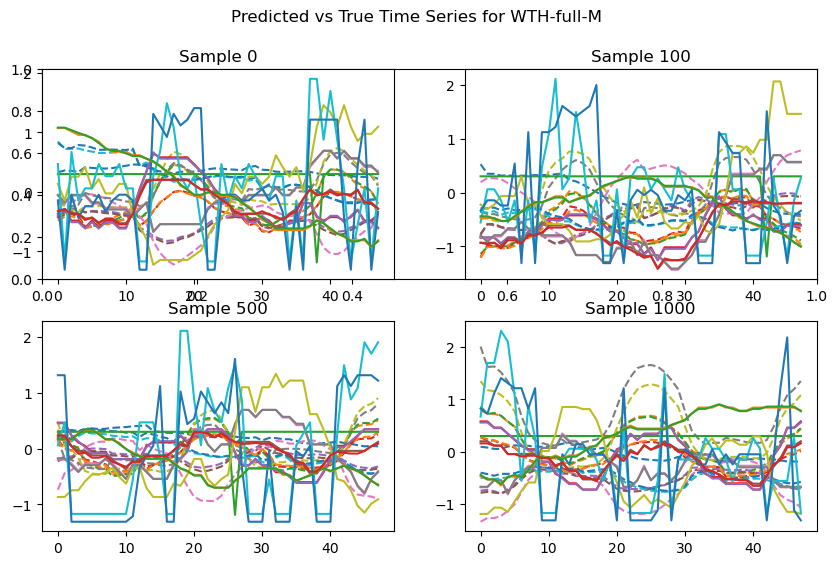

In [10]:
for key in dir_dict:

    dir = dir_dict[key]
    pred = np.load(dir + '/' + pred_file_name)
    true = np.load(dir + '/' + true_file_name)
    
    # Choose samples or time series for visualization
    sample_index = [0, 100, 500, 1000]

    # Extract the predicted and true values for the chosen sample
    pred_values = pred[sample_index].flatten()
    truth_values = true[sample_index].flatten()

    # Plot the predicted and true time series
    fig = plt.figure(figsize=(10, 6))
    fig.suptitle('Predicted vs True Time Series for {}'.format(key))
    plt.subplot(2, 1, 1)
    for i in range(len(sample_index)):
        sub = fig.add_subplot(2, 2, i+1)
        sub.plot(pred[sample_index[i]], label='Predicted', linestyle='dashed')
        sub.plot(true[sample_index[i]], label='True', linestyle='solid')
        sub.set_title('Sample {}'.format(sample_index[i]))
    fig.show()

## Results

In [11]:
table_df = pd.DataFrame(columns=metrics, index=dir_dict.keys())


for key in dir_dict:
    dir = dir_dict[key]
    results = np.load(dir + '/' + metric_file_name)
    for i, metric in enumerate(metrics):
        table_df.loc[key, metric] = results[i]
    
print(table_df)

                   MAE       MSE      RMSE      MAPE          MSPE
ETTh1-full-M  0.525643  0.516935  0.718982  8.886189  24665.078125
ETTh2-full-M  0.539579  0.484569   0.69611  3.944987     793.27655
WTH-full-M    0.425723   0.38869   0.62345  1.501555    138.259537
